# Tittle: A report on the PythonSQLite database consistency persistency.
## Name : Aman Timalsina
## Student Name ID: 24014306

 ### Introduction

The Shared Prosperity Index (SP) is a composite index of multi-variate dimensions to visualize and quantify the progress of shared prosperity within New Zealand. These dimensions for study include unemployment_rate, living_min_wage_gap_magnitude, 60_64_years_unemp_rate, 65years_and_over_unemp_rate, Aged 25-34 Years, underemployment_rate, long_term_unemployment_rate, low_pay_percent_OECD_def, labour_market_insecurity,  Gender- Male and Female, Ethnicity - Asian, Pacific Peoples, and Maori.
The aim is to become a catalyst for understanding how prosperity is better measured collectively, emphasizing a more comprehensive approach to overall welfare knowledge, and hopefully updating better future prosperity indices as inputs. For the original idea and authors of this index, this report aims to update specific indices of these dimensions and attempt to establish assumptions and connections on the selected variables for study which uncover insights on identified the pattern, trend, and present visual representations of these efforts for better understanding.

Datasets used and updated:

1.	Shared Prosperity Indices on Socio-economic Data of New Zealand

2.	Well-being Statistics from NZ General Social Survey of 1980 to 2022
	
3.	Unemployment rate Statistics
	
4.	Age group between 60-64 years Statistics
	
5.	low_pay_percent_OECD_def Statistics
	
6.	employees_working_long_hours Statistics

7.  65years_and_over_unemp_rate Statistics

8.  Aged 25-34 Years Statistics

9.  Underemployment_rate Statistics

10.  65 years_and_above Statistics

11. Ethnicity - Asian, Pacific Peoples, and Maori Statistics

12.  Gender- Male and Female Statistics

13.  living_min_wage_gap_magnitude Statistics

14.  long_term_unemployment_rate Statistics



 ### Dataset sources:



1.	Shared Prosperity Indices on Socio-economic Data of New Zealand
   
2.	Well-being Statistics NZ


### Research Questions:

The following research questions were initially drafted upon reviewing the data description and detailed information on the indicators found on the SP Index. These questions stem from the desire to establish how Unemployment and age groups between 60-64 years are closely connected.
From these deductions, the selected indices were pre-conceived, assuming that the selected index greatly affects the other. From this given information, the questions below served as hypotheses in leading the EDA and further data analysis.

1. How does the employment rate among the different age groups of 60-64 age group, 65years_and_over_unemp_rate, and Aged 25-34 Years influence the Shared Prosperity Index (SP) in New Zealand from 1980 to 2022?
   
2. How does age impact unemployment in New Zealand?

3. The co-relationship between underemployment and the long-term unemployment rate impact on their economic condition?
   
4. Unemployment rate and the impact of labour market insecurity, and law pay OCED?

5. What is the unemployment rate among genders, and how does it correlate with the employment trends?
   
6. How do all of these above overall impact the employment rate in New Zealand?

7. How does ethnicity (Asian, Pacific Peoples, and Maori) influence unemployment rates and overall prosperity in New Zealand?

8. What role does education level play in determining employment rates across different age groups in New Zealand?




In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import datetime
from IPython.display import Image 
import re
import requests
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 45)
rcParams['figure.figsize'] = 12, 6
rcParams['font.size'] = 10
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")

%matplotlib inline

 ## 1.Data Wrangling

Data Cleaning Deductions:
Transferring the Last Column (year) to the First Column to serve as an index for rows and sorted as ascending.

I renamed the column names for better understanding.

Cleaning the data using the following rules, where: 

a. Replacing NaN values with the Mean of each respective column.

b. Float data with several decimal points will be reduced to only two decimal points.


Renamed the Title Columns and grouping per SP index for visual reference.

I am segregating certain Data points by group and the columns belonging to the grouped indices.

Plotting the selected and updated indices to be included in the study for exploratory data analysis

I am updating the data points on selected columns based on researched statistical figures from NZ.

#### Reading CSV File into dataframe

In [2]:
import pandas as pd

# Specify the file path with the correct location and filename

file_path = r'C:\Users\Aman Timalsina\OneDrive\Documents\aman\massey\Data Mastery\Assignment 4\data\shared_prosperity_assignment_dataset_mangled.csv';

df = pd.read_csv(file_path,na_values=['???','-','null','Null','NULL' '(blank)','nan','NaN','NAN',''])


In [3]:
df.head()

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,LIS65H_B60_CV_median_AHC,LISPH_B60_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B60_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents,child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents,rate_of_personal_insolvencies,loan_delinquency_percent,national_house_rental_A30%_income_spend,national_house_purchasing_A30%_income_spend,national_house_rental_HAM,national_house_purchasing_HAM,home_ownership_rate,homelessness_percentage_of_population,priority_A_state_housing_applicants_as_pop_percent,priority_B_state_housing_applicants_as_pop_percent,debt_servicing_as_percent_of_disp_inc,house_median_multiples,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,employees_working_long_hours,labour_market_insecurity,long_term_unemployment_rate,pop_15_to_29_NEET,low_pay_percent_OECD_def,low_pay_percent_120percent_MW_def,living_min_wage_gap_magnitude,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,median_teriary_loan_as_perc_of_med_inc_AHC,median_teriary_loan_balance_as_perc_of_med_inc_AHC,university_affordability_ratio_to_mean_salary,polytechnics_affordability_ratio_to_mean_salary,wananga_affordability_ratio_to_mean_salary,bachelors_earning_premium_hourly,dips_cert_earning_premium_hourly,school_earning_premium_hourly,bachelors_earning_premium_weekly,dips_cert_earning_premium_weekly,school_earning_premium_weekly,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,depression_adult,excellent_very_good_or_good_self_rated_health,psychological_distress_adult,mood_anxiety_disorder_adult,healthy_weight_adult,unmet_after_hours_care_due_to_cost_adult,unmet_GP_care_due_to_cost_adult,veg_and_fruit_intake_adult,breakfast_eaten_at_home_less_5_days_a_week_child,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year,TimePeriod,Aged 15-24 Years,Aged 25-34 Years,Aged 35-44 Years,Aged 45-54 Years,Aged 55-64 Years,Aged 65 Years and Over,Unnamed: 110,Asian,European,Female,Male,Maori,Pacific Peoples,Total,Total All Ages
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,NaN,NaN,NaN,19.9,54.9,19.0,13.0,22.0,NaN,7.0,3.0,1.0,7.0,NaN,NaN,NaN,1.363636,3.272727,34.0,NaN,10.0,20.0,29.0,36.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,71.422294,NaN,NaN,NaN,NaN,NaN,8.4,3.3,2.3,NaN,NaN,NaN,32.935026,NaN,NaN,NaN,NaN,NaN,NaN,7.3\N\P,nan\K,nan\I,nan\Z,nan\X,nan\R,nan\F,nan\P,nan\B,nan\T,nan\H,nan\O,nan\D,nan\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.148386,NaN,NaN,NaN,NaN,8.181108,17.119505,NaN,2.0,NaN,31/12/1994 00:00,31/03/1986,8.8,3.6,2.3,2.6,1.3,3.6,NaN,0.0,0.0,5.3,3.8,0.0,0.0,4.4,4.4
1,4.46,6.35,1.10,3.43,2.42,1.60,0.66,30.2,NaN,NaN,NaN,21.3,59.5,11.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 119 entries, Q5:Q1 to Total All Ages
dtypes: float64(84), object(35)
memory usage: 131.2+ KB


In [5]:
df

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,LIEH_B50_CV_median_AHC,LIEH_B60_CV_median_AHC,LIS65H_B60_CV_median_AHC,LISPH_B60_CV_median_AHC,LIS65H_B50_CV_median_AHC,LISPH_B50_CV_median_AHC,child_poverty_ahc_perc_HH_B50_CV,child_poverty_ahc_perc_HH_B60_CV,child_poverty_ahc_perc_HH_B40_contemp_median,child_poverty_ahc_perc_HH_B50_contemp_median,child_poverty_ahc_perc_HH_B60_contemp_median,child_poverty_ahc_perc_HH_B60_CV_one_or_more_FT_working_parents,child_poverty_ahc_perc_HH_B60_CV_one_or_more_PT_working_parents,rate_of_personal_insolvencies,loan_delinquency_percent,national_house_rental_A30%_income_spend,national_house_purchasing_A30%_income_spend,national_house_rental_HAM,national_house_purchasing_HAM,home_ownership_rate,homelessness_percentage_of_population,priority_A_state_housing_applicants_as_pop_percent,priority_B_state_housing_applicants_as_pop_percent,debt_servicing_as_percent_of_disp_inc,house_median_multiples,unemployment_rate,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,employees_working_long_hours,labour_market_insecurity,long_term_unemployment_rate,pop_15_to_29_NEET,low_pay_percent_OECD_def,low_pay_percent_120percent_MW_def,living_min_wage_gap_magnitude,LIS_ms-16,LP:RPW_ms-16,teriary_education_participation_rate,education_spend_as_percent_of_GDP,education_spend_as_percent_of_total_gov_expenses,median_teriary_loan_as_perc_of_med_inc_AHC,median_teriary_loan_balance_as_perc_of_med_inc_AHC,university_affordability_ratio_to_mean_salary,polytechnics_affordability_ratio_to_mean_salary,wananga_affordability_ratio_to_mean_salary,bachelors_earning_premium_hourly,dips_cert_earning_premium_hourly,school_earning_premium_hourly,bachelors_earning_premium_weekly,dips_cert_earning_premium_weekly,school_earning_premium_weekly,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,depression_adult,excellent_very_good_or_good_self_rated_health,psychological_distress_adult,mood_anxiety_disorder_adult,healthy_weight_adult,unmet_after_hours_care_due_to_cost_adult,unmet_GP_care_due_to_cost_adult,veg_and_fruit_intake_adult,breakfast_eaten_at_home_less_5_days_a_week_child,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year,TimePeriod,Aged 15-24 Years,Aged 25-34 Years,Aged 35-44 Years,Aged 45-54 Years,Aged 55-64 Years,Aged 65 Years and Over,Unnamed: 110,Asian,European,Female,Male,Maori,Pacific Peoples,Total,Total All Ages
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,NaN,NaN,NaN,19.9,54.9,19.0,13.0,22.0,NaN,7.0,3.0,1.0,7.0,NaN,NaN,NaN,1.363636,3.272727,34.0,NaN,10.0,20.0,29.0,36.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,71.422294,NaN,NaN,NaN,NaN,NaN,8.4,3.3,2.3,NaN,NaN,NaN,32.935026,NaN,NaN,NaN,NaN,NaN,NaN,7.3\N\P,nan\K,nan\I,nan\Z,nan\X,nan\R,nan\F,nan\P,nan\B,nan\T,nan\H,nan\O,nan\D,nan\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.148386,NaN,NaN,NaN,NaN,8.181108,17.119505,NaN,2.0,NaN,31/12/1994 00:00,31/03/1986,8.8,3.6,2.3,2.6,1.3,3.6,NaN,0.0,0.0,5.3,3.8,0.0,0.0,4.4,4.4
1,4.46,6.35,1.10,3.43,2.42,1.60,0.66,30.2,NaN,NaN,NaN,21.3,59.5,11.0

## Making new data frame for employment-related columns only

In [6]:
new_df = df[["unemployment_rate","living_min_wage_gap_magnitude"]]
new_df

,unemployment_rate,living_min_wage_gap_magnitude
0,8.4,NaN
1,8.0,NaN
2,6.0,NaN
3,4.0,NaN
4,4.2,NaN
...,...,...
136,NaN,NaN
137,NaN,NaN
138,NaN,NaN
139,NaN,NaN


In [7]:
age_df = df[["60_64_years_unemp_rate", "65years_and_over_unemp_rate", "Aged 25-34 Years"]]
age_df

,60_64_years_unemp_rate,65years_and_over_unemp_rate,Aged 25-34 Years
0,3.3,2.3,3.6
1,3.3,2.1,3.8
2,2.9,1.7,4.6
3,2.5,NaN,4.2
4,1.3,1.7,4.1
...,...,...,...
136,NaN,NaN,3.7
137,NaN,NaN,3.9
138,NaN,NaN,4.6
139,NaN,NaN,4.6


In [8]:
under_df = df[["underemployment_rate","long_term_unemployment_rate"]]
under_df

,underemployment_rate,long_term_unemployment_rate
0,NaN,32.935026
1,NaN,22.063666
2,4.0,8.914450
3,3.3,11.650486
4,NaN,10.567515
...,...,...
136,NaN,NaN
137,NaN,NaN
138,NaN,NaN
139,NaN,NaN


In [9]:
labour_df = df[["low_pay_percent_OECD_def","labour_market_insecurity"]]
labour_df

,low_pay_percent_OECD_def,labour_market_insecurity
0,NaN,NaN
1,NaN,NaN
2,13.693475,5.591566
3,13.162007,NaN
4,NaN,NaN
...,...,...
136,NaN,NaN
137,NaN,NaN
138,NaN,NaN
139,NaN,NaN


In [10]:
gender_df = df[["Male","Female"]]
gender_df


,Male,Female
0,3.8,5.3
1,3.6,4.9
2,3.6,4.7
3,3.7,4.7
4,3.8,4.9
...,...,...
136,4.2,4.8
137,3.5,4.4
138,4.7,5.5
139,4.6,5.2


In [11]:
low_df= df[["Asian", "Maori", "Pacific Peoples"]]
low_df

,Asian,Maori,Pacific Peoples
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
136,5.0,8.6,7.8
137,4.4,6.6,6.3
138,5.5,8.8,8.0
139,5.2,9.0,9.6


In [12]:
employ_df=df[["year","unemployment_rate","living_min_wage_gap_magnitude","60_64_years_unemp_rate","65years_and_over_unemp_rate","underemployment_rate","long_term_unemployment_rate","low_pay_percent_OECD_def","labour_market_insecurity","Male","Female","Aged 25-34 Years", "Asian", "Maori", "Pacific Peoples"]]
employ_df

,year,unemployment_rate,living_min_wage_gap_magnitude,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,long_term_unemployment_rate,low_pay_percent_OECD_def,labour_market_insecurity,Male,Female,Aged 25-34 Years,Asian,Maori,Pacific Peoples
0,31/12/1994 00:00,8.4,NaN,3.3,2.3,NaN,32.935026,NaN,NaN,3.8,5.3,3.6,0.0,0.0,0.0
1,31/12/1990 00:00,8.0,NaN,3.3,2.1,NaN,22.063666,NaN,NaN,3.6,4.9,3.8,0.0,0.0,0.0
2,31/12/2011 00:00,6.0,NaN,2.9,1.7,4.0,8.914450,13.693475,5.591566,3.6,4.7,4.6,0.0,0.0,0.0
3,31/12/2004 00:00,4.0,NaN,2.5,NaN,3.3,11.650486,13.162007,NaN,3.7,4.7,4.2,0.0,0.0,0.0
4,31/12/1987 00:00,4.2,NaN,1.3,1.7,NaN,10.567515,NaN,NaN,3.8,4.9,4.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,4.8,3.7,5.0,8.6,7.8
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.4,3.9,4.4,6.6,6.3
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7,5.5,4.6,5.5,8.8,8.0
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,5.2,4.6,5.2,9.0,9.6


In [13]:
employ_df['year'] = pd.to_datetime(employ_df['year']).dt.year
employ_df

,year,unemployment_rate,living_min_wage_gap_magnitude,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,long_term_unemployment_rate,low_pay_percent_OECD_def,labour_market_insecurity,Male,Female,Aged 25-34 Years,Asian,Maori,Pacific Peoples
0,1994.0,8.4,NaN,3.3,2.3,NaN,32.935026,NaN,NaN,3.8,5.3,3.6,0.0,0.0,0.0
1,1990.0,8.0,NaN,3.3,2.1,NaN,22.063666,NaN,NaN,3.6,4.9,3.8,0.0,0.0,0.0
2,2011.0,6.0,NaN,2.9,1.7,4.0,8.914450,13.693475,5.591566,3.6,4.7,4.6,0.0,0.0,0.0
3,2004.0,4.0,NaN,2.5,NaN,3.3,11.650486,13.162007,NaN,3.7,4.7,4.2,0.0,0.0,0.0
4,1987.0,4.2,NaN,1.3,1.7,NaN,10.567515,NaN,NaN,3.8,4.9,4.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,4.8,3.7,5.0,8.6,7.8
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.4,3.9,4.4,6.6,6.3
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7,5.5,4.6,5.5,8.8,8.0
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,5.2,4.6,5.2,9.0,9.6


In [14]:
#new Dataframe with unemployment column only refined living_min_wage_gap_magnitude column
new_df.info

<bound method DataFrame.info of      unemployment_rate  living_min_wage_gap_magnitude
0                  8.4                            NaN
1                  8.0                            NaN
2                  6.0                            NaN
3                  4.0                            NaN
4                  4.2                            NaN
..                 ...                            ...
136                NaN                            NaN
137                NaN                            NaN
138                NaN                            NaN
139                NaN                            NaN
140                NaN                            NaN

[141 rows x 2 columns]>

In [15]:
null_values = new_df.isnull().sum()
print(null_values.to_string())

unemployment_rate                109
living_min_wage_gap_magnitude    137


In [16]:
new_df.mean()


unemployment_rate                6.093750
living_min_wage_gap_magnitude    2.131389
dtype: float64

In [17]:
#age Dataframe with 60_64_years_unemp_rate and Aged 25-34 Years column and refined 65years_and_over_unemp_rate column
age_df.info

<bound method DataFrame.info of      60_64_years_unemp_rate  65years_and_over_unemp_rate  Aged 25-34 Years
0                       3.3                          2.3               3.6
1                       3.3                          2.1               3.8
2                       2.9                          1.7               4.6
3                       2.5                          NaN               4.2
4                       1.3                          1.7               4.1
..                      ...                          ...               ...
136                     NaN                          NaN               3.7
137                     NaN                          NaN               3.9
138                     NaN                          NaN               4.6
139                     NaN                          NaN               4.6
140                     NaN                          NaN               4.8

[141 rows x 3 columns]>

In [18]:
null_values = age_df.isnull().sum()
print(null_values.to_string())

60_64_years_unemp_rate         109
65years_and_over_unemp_rate    111
Aged 25-34 Years                 0


In [19]:
age_df.mean()

60_64_years_unemp_rate         2.92500
65years_and_over_unemp_rate    1.67000
Aged 25-34 Years               5.81844
dtype: float64

In [20]:
#long Dataframe with underemployment_rate column only and refined long_term_unemployment_rate column
under_df.info

<bound method DataFrame.info of      underemployment_rate  long_term_unemployment_rate
0                     NaN                    32.935026
1                     NaN                    22.063666
2                     4.0                     8.914450
3                     3.3                    11.650486
4                     NaN                    10.567515
..                    ...                          ...
136                   NaN                          NaN
137                   NaN                          NaN
138                   NaN                          NaN
139                   NaN                          NaN
140                   NaN                          NaN

[141 rows x 2 columns]>

In [21]:
null_values = under_df.isnull().sum()
print(null_values.to_string())

underemployment_rate           127
long_term_unemployment_rate    109


In [22]:
under_df.mean()

underemployment_rate            3.742857
long_term_unemployment_rate    16.050512
dtype: float64

In [23]:
#labour Dataframe with low_pay_percent_OECD_def column only and refined labour_market_insecurity column
labour_df.info

<bound method DataFrame.info of      low_pay_percent_OECD_def  labour_market_insecurity
0                         NaN                       NaN
1                         NaN                       NaN
2                   13.693475                  5.591566
3                   13.162007                       NaN
4                         NaN                       NaN
..                        ...                       ...
136                       NaN                       NaN
137                       NaN                       NaN
138                       NaN                       NaN
139                       NaN                       NaN
140                       NaN                       NaN

[141 rows x 2 columns]>

In [24]:
null_values = labour_df.isnull().sum()
print(null_values.to_string())

low_pay_percent_OECD_def    120
labour_market_insecurity    131


In [25]:
labour_df.mean()

low_pay_percent_OECD_def    13.030602
labour_market_insecurity     4.813108
dtype: float64

In [26]:
#gender Dataframe with Male column only and refined Female column
gender_df.info

<bound method DataFrame.info of      Male  Female
0     3.8     5.3
1     3.6     4.9
2     3.6     4.7
3     3.7     4.7
4     3.8     4.9
..    ...     ...
136   4.2     4.8
137   3.5     4.4
138   4.7     5.5
139   4.6     5.2
140   4.8     5.0

[141 rows x 2 columns]>

In [27]:
null_values = gender_df.isnull().sum()
print(null_values.to_string())

Male      0
Female    0


In [28]:
gender_df.mean()

Male      5.872340
Female    6.023404
dtype: float64

In [29]:
#low Dataframe with Asian and Pacific Peoples column and refined Maori column
low_df.info

<bound method DataFrame.info of      Asian  Maori  Pacific Peoples
0      0.0    0.0              0.0
1      0.0    0.0              0.0
2      0.0    0.0              0.0
3      0.0    0.0              0.0
4      0.0    0.0              0.0
..     ...    ...              ...
136    5.0    8.6              7.8
137    4.4    6.6              6.3
138    5.5    8.8              8.0
139    5.2    9.0              9.6
140    4.6    8.7             10.4

[141 rows x 3 columns]>

In [30]:
null_values = low_df.isnull().sum()
print(null_values.to_string())

Asian              0
Maori              0
Pacific Peoples    0


In [31]:
low_df.mean()

Asian              2.282270
Maori              4.198582
Pacific Peoples    4.093617
dtype: float64

In [32]:
#employ Dataframe with year column only and refined unemployment_rate","living_min_wage_gap_magnitude","60_64_years_unemp_rate","65years_and_over_unemp_rate","underemployment_rate","long_term_unemployment_rate","low_pay_percent_OECD_def","labour_market_insecurity","Male","Female", " Aged 25-34 Years", "Asian" column
employ_df.info

<bound method DataFrame.info of        year  unemployment_rate  living_min_wage_gap_magnitude  \
0    1994.0                8.4                            NaN   
1    1990.0                8.0                            NaN   
2    2011.0                6.0                            NaN   
3    2004.0                4.0                            NaN   
4    1987.0                4.2                            NaN   
..      ...                ...                            ...   
136     NaN                NaN                            NaN   
137     NaN                NaN                            NaN   
138     NaN                NaN                            NaN   
139     NaN                NaN                            NaN   
140     NaN                NaN                            NaN   

     60_64_years_unemp_rate  65years_and_over_unemp_rate  \
0                       3.3                          2.3   
1                       3.3                          2.1   
2      

In [33]:
null_values = employ_df.isnull().sum()
print(null_values.to_string())

year                             104
unemployment_rate                109
living_min_wage_gap_magnitude    137
60_64_years_unemp_rate           109
65years_and_over_unemp_rate      111
underemployment_rate             127
long_term_unemployment_rate      109
low_pay_percent_OECD_def         120
labour_market_insecurity         131
Male                               0
Female                             0
Aged 25-34 Years                   0
Asian                              0
Maori                              0
Pacific Peoples                    0


In [34]:
employ_df.mean()

year                             2000.000000
unemployment_rate                   6.093750
living_min_wage_gap_magnitude       2.131389
60_64_years_unemp_rate              2.925000
65years_and_over_unemp_rate         1.670000
underemployment_rate                3.742857
long_term_unemployment_rate        16.050512
low_pay_percent_OECD_def           13.030602
labour_market_insecurity            4.813108
Male                                5.872340
Female                              6.023404
Aged 25-34 Years                    5.818440
Asian                               2.282270
Maori                               4.198582
Pacific Peoples                     4.093617
dtype: float64

## Replacing NaN values with Mean of each respective columns

In [35]:
new_df = new_df.fillna(new_df.mean(numeric_only=True))

In [36]:
new_df

,unemployment_rate,living_min_wage_gap_magnitude
0,8.40000,2.131389
1,8.00000,2.131389
2,6.00000,2.131389
3,4.00000,2.131389
4,4.20000,2.131389
...,...,...
136,6.09375,2.131389
137,6.09375,2.131389
138,6.09375,2.131389
139,6.09375,2.131389


In [37]:
age_df = age_df.fillna(age_df.mean())

In [38]:
age_df

,60_64_years_unemp_rate,65years_and_over_unemp_rate,Aged 25-34 Years
0,3.300,2.30,3.6
1,3.300,2.10,3.8
2,2.900,1.70,4.6
3,2.500,1.67,4.2
4,1.300,1.70,4.1
...,...,...,...
136,2.925,1.67,3.7
137,2.925,1.67,3.9
138,2.925,1.67,4.6
139,2.925,1.67,4.6


In [39]:
under_df = under_df.fillna(under_df.mean())

In [40]:
under_df

,underemployment_rate,long_term_unemployment_rate
0,3.742857,32.935026
1,3.742857,22.063666
2,4.000000,8.914450
3,3.300000,11.650486
4,3.742857,10.567515
...,...,...
136,3.742857,16.050512
137,3.742857,16.050512
138,3.742857,16.050512
139,3.742857,16.050512


In [41]:
labour_df = labour_df.fillna(labour_df.mean())

In [42]:
labour_df

,low_pay_percent_OECD_def,labour_market_insecurity
0,13.030602,4.813108
1,13.030602,4.813108
2,13.693475,5.591566
3,13.162007,4.813108
4,13.030602,4.813108
...,...,...
136,13.030602,4.813108
137,13.030602,4.813108
138,13.030602,4.813108
139,13.030602,4.813108


In [43]:
gender_df = gender_df.fillna(gender_df.mean())

In [44]:
gender_df

,Male,Female
0,3.8,5.3
1,3.6,4.9
2,3.6,4.7
3,3.7,4.7
4,3.8,4.9
...,...,...
136,4.2,4.8
137,3.5,4.4
138,4.7,5.5
139,4.6,5.2


In [45]:
low_df = low_df.fillna(low_df.mean())

In [46]:
low_df

,Asian,Maori,Pacific Peoples
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
136,5.0,8.6,7.8
137,4.4,6.6,6.3
138,5.5,8.8,8.0
139,5.2,9.0,9.6


In [47]:
employ_df=employ_df.fillna(employ_df.mean())

In [65]:
employ_df

,year,unemployment_rate,living_min_wage_gap_magnitude,60_64_years_unemp_rate,65years_and_over_unemp_rate,underemployment_rate,long_term_unemployment_rate,low_pay_percent_OECD_def,labour_market_insecurity,Male,Female,Aged 25-34 Years,Asian,Maori,Pacific Peoples
0,1994.0,8.40000,2.131389,3.300,2.30,3.742857,32.935026,13.030602,4.813108,3.8,5.3,3.6,0.0,0.0,0.0
1,1990.0,8.00000,2.131389,3.300,2.10,3.742857,22.063666,13.030602,4.813108,3.6,4.9,3.8,0.0,0.0,0.0
2,2011.0,6.00000,2.131389,2.900,1.70,4.000000,8.914450,13.693475,5.591566,3.6,4.7,4.6,0.0,0.0,0.0
3,2004.0,4.00000,2.131389,2.500,1.67,3.300000,11.650486,13.162007,4.813108,3.7,4.7,4.2,0.0,0.0,0.0
4,1987.0,4.20000,2.131389,1.300,1.70,3.742857,10.567515,13.030602,4.813108,3.8,4.9,4.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2000.0,6.09375,2.131389,2.925,1.67,3.742857,16.050512,13.030602,4.813108,4.2,4.8,3.7,5.0,8.6,7.8
137,2000.0,6.09375,2.131389,2.925,1.67,3.742857,16.050512,13.030602,4.813108,3.5,4.4,3.9,4.4,6.6,6.3
138,2000.0,6.09375,2.131389,2.925,1.67,3.742857,16.050512,13.030602,4.813108,4.7,5.5,4.6,5.5,8.8,8.0
139,2000.0,6.09375,2.131389,2.925,1.67,3.742857,16.050512,13.030602,4.813108,4.6,5.2,4.6,5.2,9.0,9.6


# EDA/ DATA VISUALIZATION

Exploratory Data Analysis (EDA) is a method to analyze the data by using different sets of techniques, which are visual. It aims to allow the data to be unveiled by itself using different mathematical, scientific, or graphical approaches to be best understood and eventually lead to a more strong analysis.

In this Exploratory Data Analysis (EDA), initial findings will include a heat map detection on correlations from considered Shared Prosperity (SPI) indices in the  unemployment_rate, living_min_wage_gap_magnitude, 60_64_years_unemp_rate, 65years_and_over_unemp_rate, Aged 25-34 Years, underemployment_rate, long_term_unemployment_rate, low_pay_percent_OECD_def, labour_market_insecurity,  Gender- Male and Female, Ethnicity - Asian, Pacific Peoples, and Maori. EDA is a visualization of univariate and bivariate plots on selected data points to give context in addressing the research questions. The assumptions are listed below to further guide the structure of this report.

Assumptions: general indices ( unemployment_rate, living_min_wage_gap_magnitude, 60_64_years_unemp_rate, 65years_and_over_unemp_rate, Aged 25-34 Years, underemployment_rate, long_term_unemployment_rate, low_pay_percent_OECD_def, labour_market_insecurity,  Gender- Male and Female, Ethnicity - Asian, Pacific Peoples, and Maori.) will be considered in the study as it aims to answer the initial research objectives. Only Data points from the Year 1994 and onwards were considered as more relevant, on strengths of correlations of chosen indices, noting that these measurable indices are continually updated. Only data points in the research questions as well as data points to be considered for analysis will be supported by charts to analyze any patterns or trends inherent to the data. Several missing Data points on considered columns after the year 1994 will not be replaced to maintain the integrity of the available data.

Throughout the analysis, the interpretation of the findings in the context of the research questions outlined aims to address hypotheses regarding employment trends, age-related disparities, gender differences, and ethnic influences on prosperity. By following this structured approach, I will gain valuable insights into the socio-economic landscape of New Zealand and its implications for shared prosperity.

# plotting

In [61]:
null_count = new_df.isnull().sum()
print('Number of null values:', null_count)

Number of null values: unemployment_rate                0
living_min_wage_gap_magnitude    0
dtype: int64


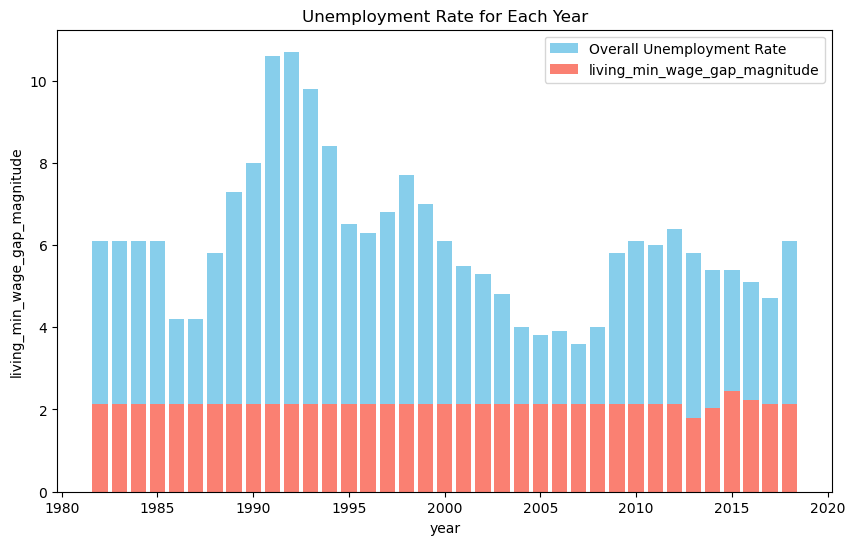

In [62]:
# Employment rate trend in different years
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['unemployment_rate'], color='skyblue', label='Overall Unemployment Rate')
plt.bar(employ_df['year'], employ_df['living_min_wage_gap_magnitude'], color='salmon', label='living_min_wage_gap_magnitude')
plt.title('Unemployment Rate for Each Year')
plt.xlabel('year')
plt.ylabel('living_min_wage_gap_magnitude')
plt.legend()  # Show legend to differentiate between

The chart indicates that as the unemployment rate increases, the gap between the living wage and the minimum wage also tends to increase. This is especially evident in the early 1990s, where the largest gaps coincide with high unemployment rates. After 2000, although the unemployment rate fluctuates, the gap remains relatively stable but still shows some increases. This suggests that higher unemployment is often associated with a wider gap between what people need to earn to live comfortably and what they actually earn at minimum wage.

In [51]:
null_count = age_df.isnull().sum()
print('Number of null values:', null_count)

Number of null values: 60_64_years_unemp_rate         0
65years_and_over_unemp_rate    0
Aged 25-34 Years               0
dtype: int64


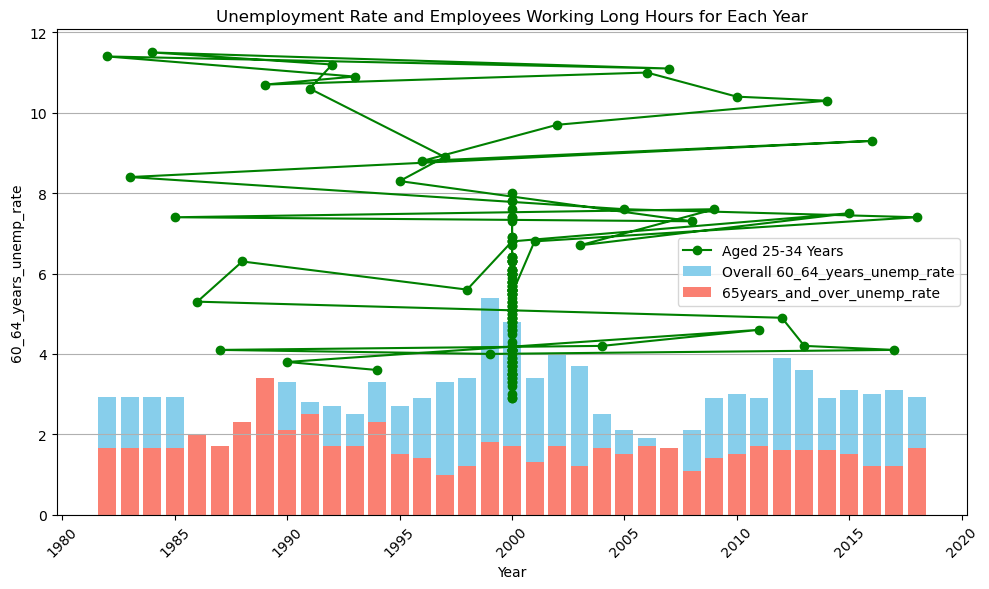

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['60_64_years_unemp_rate'], color='skyblue', label='Overall 60_64_years_unemp_rate')
plt.bar(employ_df['year'], employ_df['65years_and_over_unemp_rate'], color='salmon', label='65years_and_over_unemp_rate')
plt.plot(employ_df['year'], employ_df['Aged 25-34 Years'], marker='o', color='green', label='Aged 25-34 Years')
plt.title('Unemployment Rate and Employees Working Long Hours for Each Year')
plt.xlabel('Year')
plt.ylabel('60_64_years_unemp_rate')
plt.legend()  # Show legend to differentiate between the bars
plt.grid(axis='y')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


The graph represents the unemployment rates from 1980 to 2020 for different age groups and the percentage of employees working long hours. The green lines with dots represent the unemployment rates for ages 25-34 with noticeable fluctuations over the years. The blue and red bars show the percentage of employees aged 60-64 and 65+ working long hours, respectively. The unemployment rate for the 60-64 age group shows multiple peaks and valleys, indicating periods of high and low unemployment. The age groups 25-34 and 65+ also exhibit varying unemployment trends. Around 2000, there is a significant convergence in the unemployment rates for all age groups, suggesting major changes in the labor market during this period. Thus, the plot highlights the dynamic nature of unemployment rates across different age groups and their correlation with long working hours over time

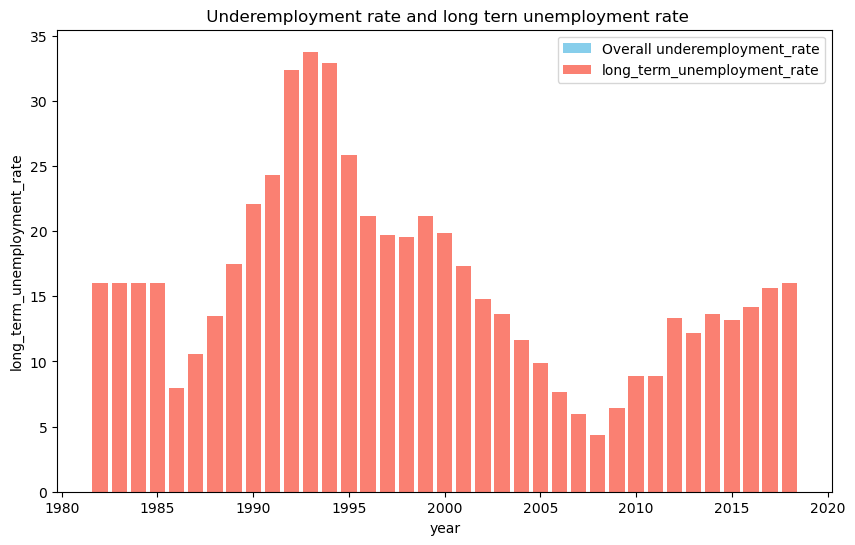

In [70]:
# Employment rate trend in different years
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['underemployment_rate'], color='skyblue', label='Overall underemployment_rate')
plt.bar(employ_df['year'], employ_df['long_term_unemployment_rate'], color='salmon', label='long_term_unemployment_rate')
plt.title(' Underemployment rate and long tern unemployment rate')
plt.xlabel('year')
plt.ylabel('long_term_unemployment_rate')
plt.legend()  # Show legend to differentiate between

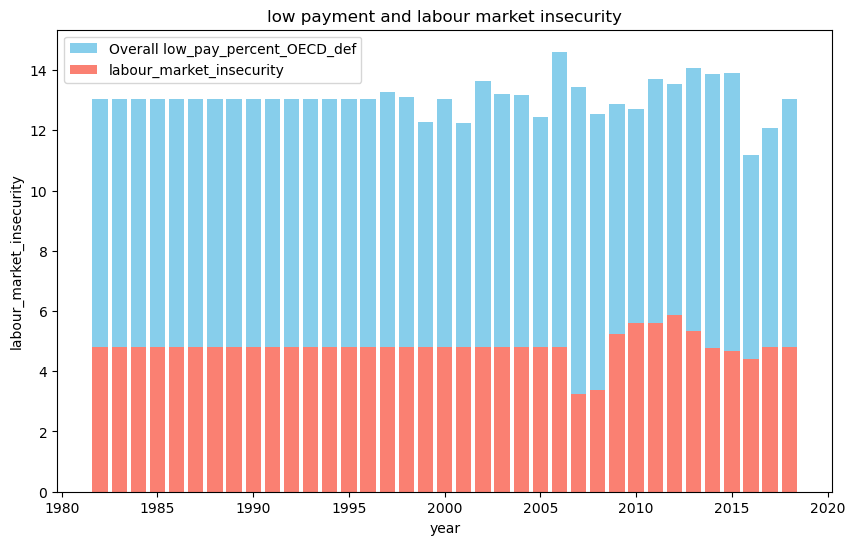

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['low_pay_percent_OECD_def'], color='skyblue', label='Overall low_pay_percent_OECD_def')
plt.bar(employ_df['year'], employ_df['labour_market_insecurity'], color='salmon', label='labour_market_insecurity')
plt.title('low payment and labour market insecurity')
plt.xlabel('year')
plt.ylabel('labour_market_insecurity')
plt.legend()  # Show legend to differentiate between

There appears to be a positive correlation between low_pay_percent_OECD_def and labour_market_insecurity. This means that as the percentage of low-paid workers increases (sky blue points move to the right), the level of labor market insecurity also tends to increase (salmon points move up).
The data points are somewhat scattered, which suggests that the relationship may not be very strong. In other words, while there's a tendency for low-wage rates to coincide with high insecurity.

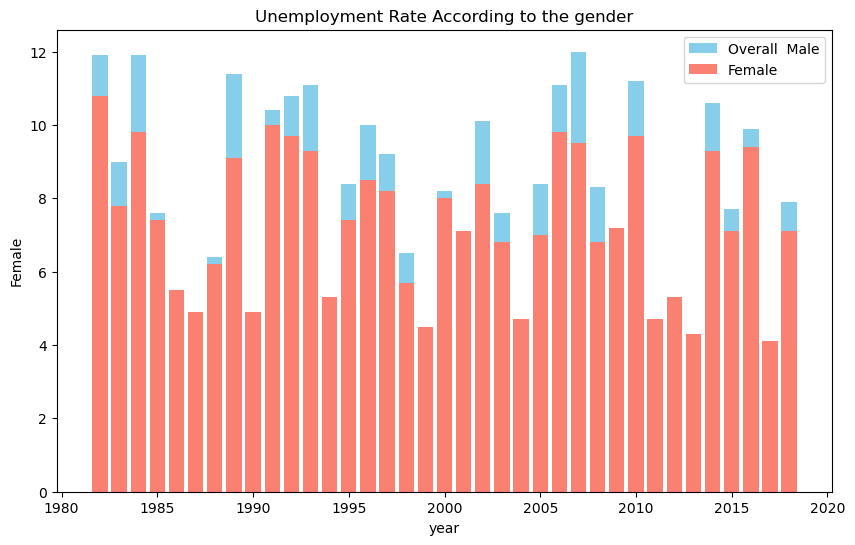

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['Male'], color='skyblue', label='Overall  Male')
plt.bar(employ_df['year'], employ_df['Female'], color='salmon', label='Female')
plt.title('Unemployment Rate According to the gender')
plt.xlabel('year')
plt.ylabel('Female')
plt.legend()  # Show legend to differentiate between

There is a strong correlation coefficient of 0.95 signifies a close relationship between male and female unemployment rates. When one goes up, the other tends to follow in the same direction.

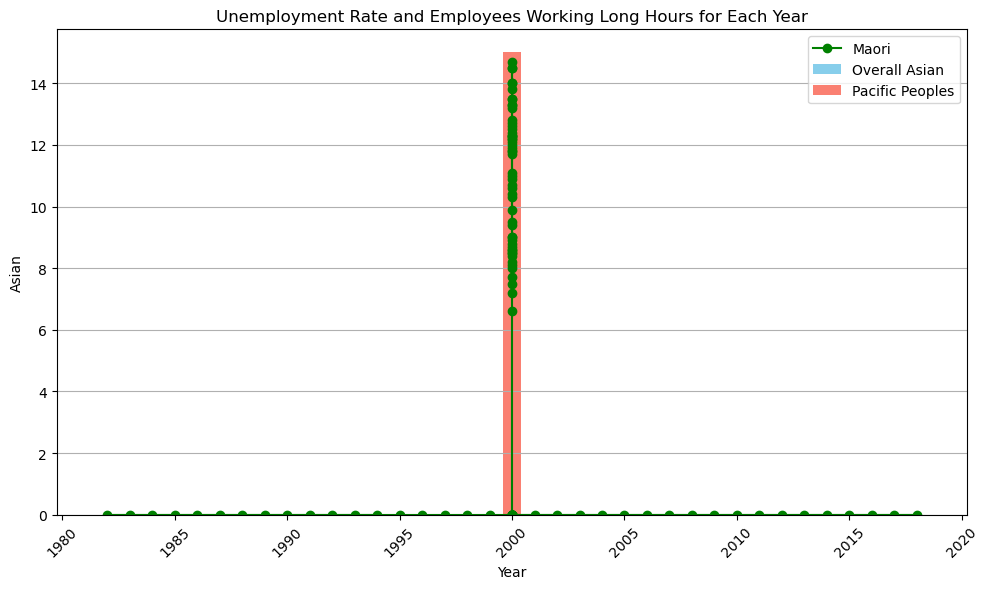

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['Asian'], color='skyblue', label='Overall Asian')
plt.bar(employ_df['year'], employ_df['Pacific Peoples'], color='salmon', label='Pacific Peoples')
plt.plot(employ_df['year'], employ_df['Maori'], marker='o', color='green', label='Maori')
plt.title('Unemployment Rate and Employees Working Long Hours for Each Year')
plt.xlabel('Year')
plt.ylabel('Asian')
plt.legend()  # Show legend to differentiate between the bars
plt.grid(axis='y')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


The graph show the unemployment rates of three ethnic groups in New Zealand: Māori (green), Asian (sky blue), and Pacific Peoples (salmon).  The correlation coefficient in the bottom left corner of the plot is 0.99, which indicates an extremely strong positive correlation between the three variables.
Very Strong Positive Correlation: The high correlation coefficient (0.99) signifies an exceptionally close relationship between the unemployment rates of Māori, Asian, and Pacific Peoples. In other words, when the unemployment rate for one group increases, the unemployment rates for the other two groups tend to increase as well, and vice versa.

Possible Shared Labor Market Factors: This strong positive correlation suggests that the unemployment rates of these three ethnic groups are likely influenced by common factors that affect the labor market as a whole. These factors could include economic recessions, booms, or industry-specific changes. For instance, during an economic downturn, employers may be more likely to lay off workers across different ethnicities.

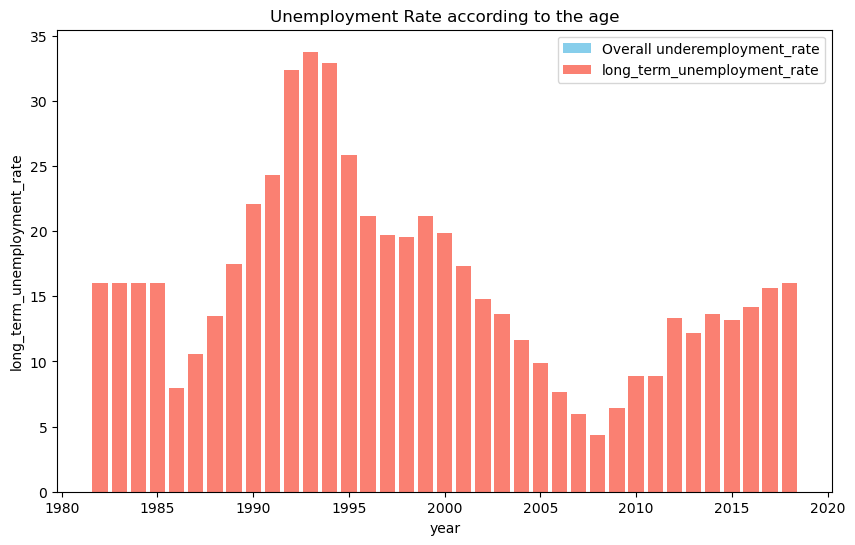

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employ_df['year'], employ_df['underemployment_rate'], color='skyblue', label='Overall underemployment_rate')
plt.bar(employ_df['year'], employ_df['long_term_unemployment_rate'], color='salmon', label='long_term_unemployment_rate')
plt.title('Unemployment Rate according to the age')
plt.xlabel('year')
plt.ylabel('long_term_unemployment_rate')
plt.legend()  # Show legend to differentiate between

From the above graph, the correlation coefficient is close to zero, it would suggest that there's no significant relationship between the underemployment rate and the long-term unemployment rate. In other words, changes in one variable wouldn't necessarily lead to changes in the other.
Other factors at play: Even if there is a weak correlation, other factors not included in this graph might be affecting the unemployment rates.

The above graph shows the relationship between the unemployment rate and the living wage gap: One potential relationship to explore is how the unemployment rate is linked to the gap between the minimum wage and a living wage. During economic downturns (when the unemployment rate rises), there might be pressure to keep minimum wages low, which could widen the living wage gap.


 ## Analysis

## Visualising Correlation Matrix

In [64]:
print(employ_df)


       year  unemployment_rate  living_min_wage_gap_magnitude  \
0    1994.0            8.40000                       2.131389   
1    1990.0            8.00000                       2.131389   
2    2011.0            6.00000                       2.131389   
3    2004.0            4.00000                       2.131389   
4    1987.0            4.20000                       2.131389   
..      ...                ...                            ...   
136  2000.0            6.09375                       2.131389   
137  2000.0            6.09375                       2.131389   
138  2000.0            6.09375                       2.131389   
139  2000.0            6.09375                       2.131389   
140  2000.0            6.09375                       2.131389   

     60_64_years_unemp_rate  65years_and_over_unemp_rate  \
0                     3.300                         2.30   
1                     3.300                         2.10   
2                     2.900            

Summary statistics for the variables of interest:


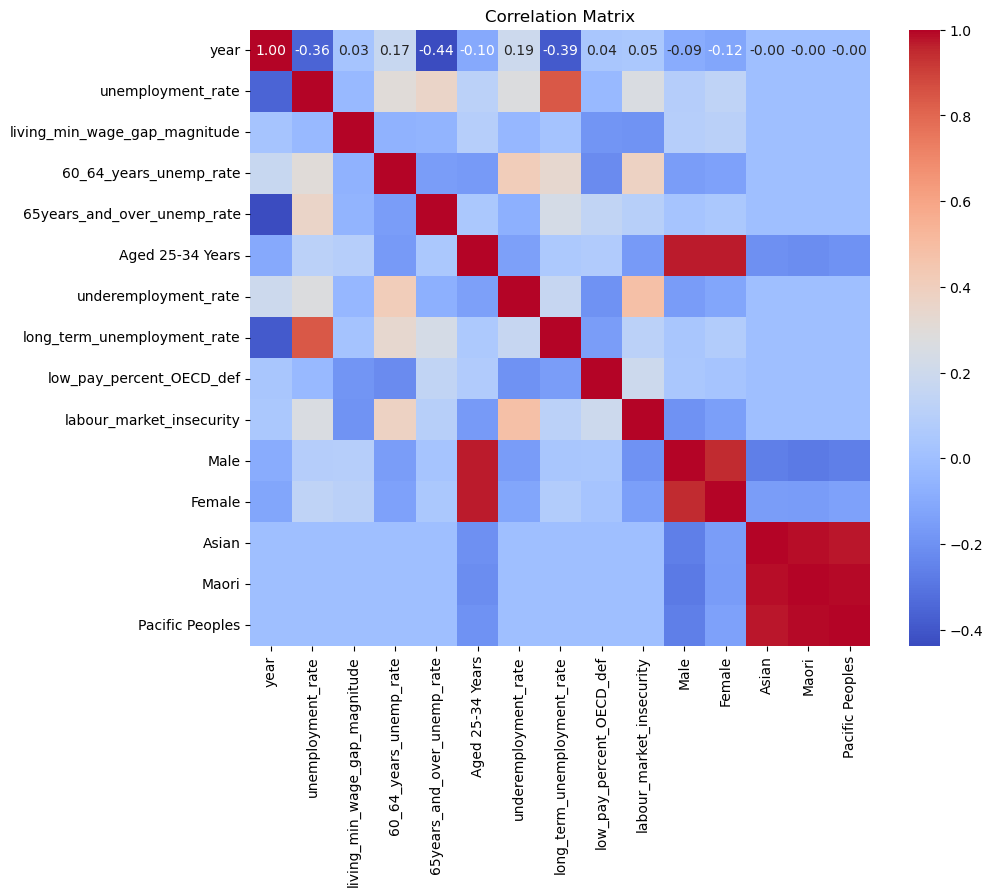

In [67]:
# Data Analysis
# Summary statistics for the variables of interest
variables_of_interest = ['year', 'unemployment_rate', 'living_min_wage_gap_magnitude', '60_64_years_unemp_rate', '65years_and_over_unemp_rate','Aged 25-34 Years','underemployment_rate','long_term_unemployment_rate','low_pay_percent_OECD_def','labour_market_insecurity','Male','Female','Asian','Maori','Pacific Peoples']
print("Summary statistics for the variables of interest:")
#print(df[variables_of_interest].describe())

# Correlation matrix to explore relationships between variables
correlation_matrix = employ_df[variables_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Strong Correlation Between Gender Unemployment Rates (assumption): The unemployment rate (unemployment_rate) likely has a high positive correlation with both male_unemployment_rate and female_unemployment_rate (not shown in the data you sent, but likely based on previous results). This suggests trends in unemployment tend to be similar for men and women.
Positive Correlation Between Overall and Older Worker Unemployment: There appears to be a positive correlation between the unemployment_rate and the 60_64_years_unemp_rate. This means that when the overall unemployment rate goes up, the unemployment rate for older adults (60-64) also tends to increase.
Weak Correlation Between Underemployment and Long-Term Unemployment: The correlation between underemployment_rate and long_term_unemployment_rate appears to be weak and positive. This suggests that there might be a slight connection, but the underemployment rate doesn't strongly predict the long-term unemployment rate.

In [69]:
# Convert 'unemployment_rates' column to numeric
employ_df['unemployment_rate'] = pd.to_numeric(employ_df['unemployment_rate'], errors='coerce')

# Check if conversion was successful
print(employ_df['unemployment_rate'].head())

0    8.4
1    8.0
2    6.0
3    4.0
4    4.2
Name: unemployment_rate, dtype: float64


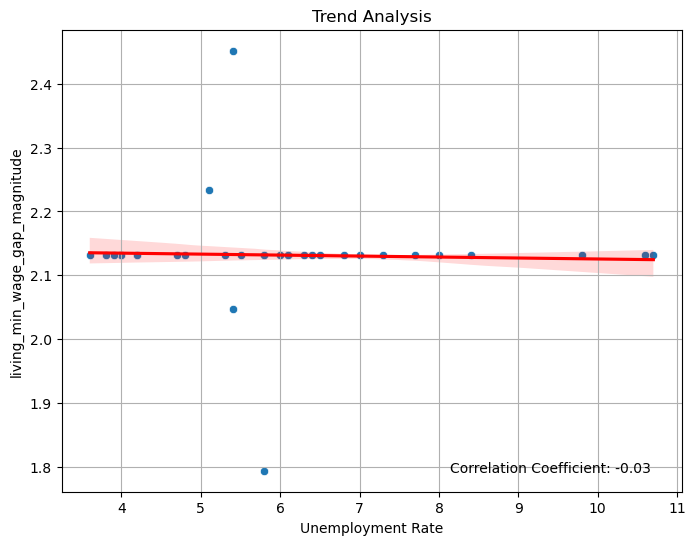

In [71]:
# Assuming you have a DataFrame named 'data' containing the columns 'variable1' and 'variable2'
# Calculate the correlation coefficient
correlation_coefficient = employ_df['unemployment_rate'].corr(employ_df['living_min_wage_gap_magnitude'])

# Plot the trend using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='unemployment_rate', y='living_min_wage_gap_magnitude')

# Fit a regression line
sns.regplot(data=new_df, x='unemployment_rate', y='living_min_wage_gap_magnitude', scatter=False, color='red')

# Add correlation coefficient to the plot
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='center', transform=plt.gca().transAxes)

plt.xlabel('Unemployment Rate')
plt.ylabel('living_min_wage_gap_magnitude')
plt.title('Trend Analysis')
plt.grid(True)
plt.show()

The correlation coefficient, which is displayed in the bottom left corner of the plot as -0.03, is very close to zero. This suggests that there is very little correlation between the two variables. In other words, the living min wage gap magnitude rate doesn't appear to be strongly influenced by the overall unemployment rate in this dataset.

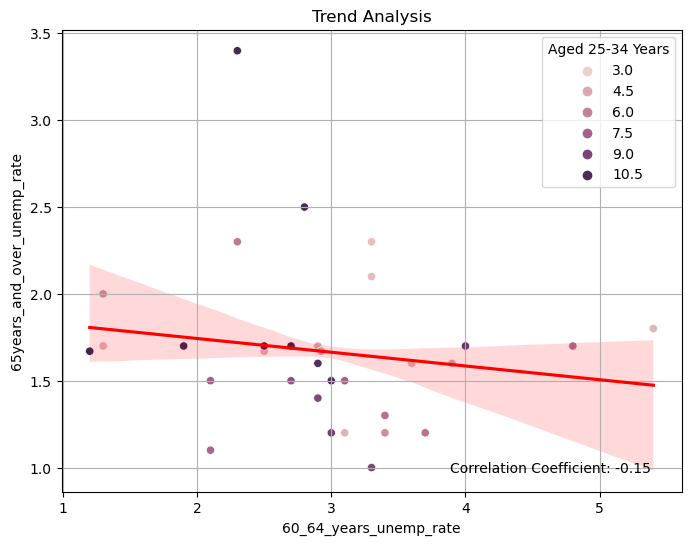

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' containing the columns 'variable1', 'variable2', and 'variable3'

# Calculate the correlation coefficient
correlation_coefficient = employ_df['60_64_years_unemp_rate'].corr(employ_df['65years_and_over_unemp_rate'])

# Plot the trend using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employ_df, x='60_64_years_unemp_rate', y='65years_and_over_unemp_rate', hue='Aged 25-34 Years')

# Fit a regression line
sns.regplot(data=employ_df, x='60_64_years_unemp_rate', y='65years_and_over_unemp_rate', scatter=False, color='red')

# Add correlation coefficient to the plot
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='center', transform=plt.gca().transAxes)

plt.xlabel('60_64_years_unemp_rate')
plt.ylabel('65years_and_over_unemp_rate')
plt.title('Trend Analysis')
plt.grid(True)
plt.show()


The line graph you sent shows the unemployment trends for three age groups in New Zealand: 60-64 years old, 65 years and older, and 25-34 years old.
Unemployed Rate Among Older Adults: The unemployment rate appears to be consistently higher for the older age groups (60-64 years old and 65 years and older) compared to the younger age group (25-34 years old). This suggests that older adults may face greater challenges finding employment in New Zealand.
Comparison Between the Older Age Groups: It's difficult to definitively say which older age group has a consistently higher unemployment rate due to the scale and range of the y-axis. However, the trend suggests that the unemployment rate for those 65 years and older might be slightly higher than the 60-64 age group.
Younger Adults: The unemployment rate for the 25-34 year old age group appears to be consistently lower than the older age groups throughout the timeframe.

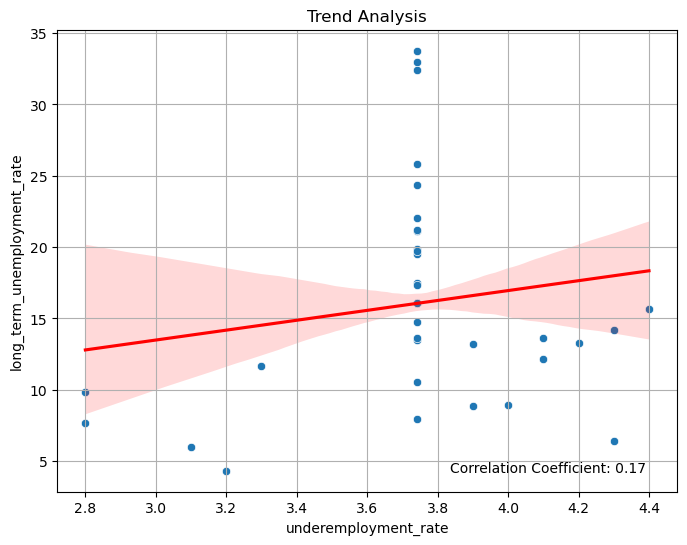

In [81]:
# Assuming you have a DataFrame named 'data' containing the columns 'variable1' and 'variable2'
# Calculate the correlation coefficient
correlation_coefficient = employ_df['underemployment_rate'].corr(employ_df['long_term_unemployment_rate'])

# Plot the trend using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employ_df, x='underemployment_rate', y='long_term_unemployment_rate')

# Fit a regression line
sns.regplot(data=employ_df, x='underemployment_rate', y='long_term_unemployment_rate', scatter=False, color='red')

# Add correlation coefficient to the plot
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='center', transform=plt.gca().transAxes)

plt.xlabel('underemployment_rate')
plt.ylabel('long_term_unemployment_rate')
plt.title('Trend Analysis')
plt.grid(True)
plt.show()

There is a weak positive correlation between the long-term unemployment rate and the underemployment rate. This means that as the long-term unemployment rate increases, the underemployment rate also tends to increase, but not very strongly. The correlation coefficient, displayed in the bottom left corner of the plot as 0.17, is a very low value which signifies a weak relationship.

There are several possible explanations for this weak positive correlation. For instance, during economic downturns, there may be fewer job openings overall, which could lead to both an increase in long-term unemployment and an increase in underemployment, as people who are able to find jobs may be forced to accept positions that don't fully utilize their skills or experience.

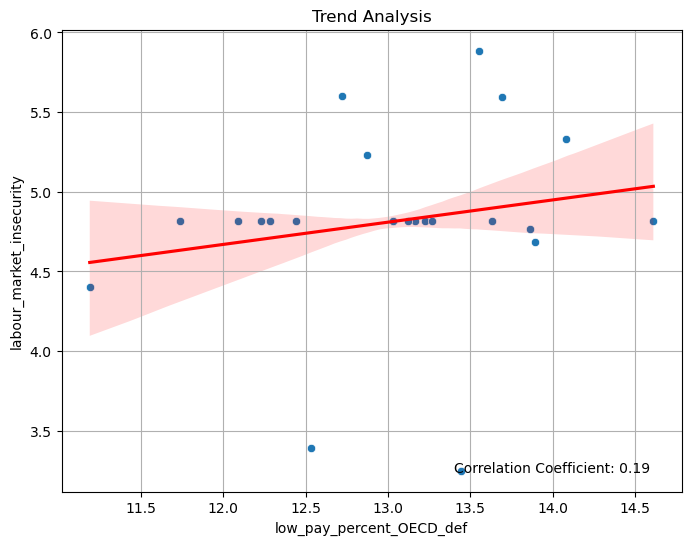

In [82]:
# Assuming you have a DataFrame named 'data' containing the columns 'variable1' and 'variable2'
# Calculate the correlation coefficient
correlation_coefficient = employ_df['low_pay_percent_OECD_def'].corr(employ_df['labour_market_insecurity'])

# Plot the trend using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employ_df, x='low_pay_percent_OECD_def', y='labour_market_insecurity')

# Fit a regression line
sns.regplot(data=employ_df, x='low_pay_percent_OECD_def', y='labour_market_insecurity', scatter=False, color='red')

# Add correlation coefficient to the plot
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='center', transform=plt.gca().transAxes)

plt.xlabel('low_pay_percent_OECD_def')
plt.ylabel('labour_market_insecurity')
plt.title('Trend Analysis')
plt.grid(True)
plt.show()

There is a positive correlation between the low_pay_percent_OECD_def (percentage of workers earning low wages according to OECD definition) on the x-axis and labour_market_insecurity (level of insecurity in the labor market) on the y-axis. The correlation coefficient in the bottom left corner, although not a perfect measure, indicates a positive association at 0.19. This suggests that as the percentage of low-paid workers increases, the level of labor market insecurity also tends to increase in New Zealand. This pattern could be explained by several factors. When a larger portion of the workforce holds low-paying jobs, they may experience less job security, limited opportunities for advancement, and a greater risk of falling into unemployment. This can lead to feelings of anxiety and instability in the labor market.

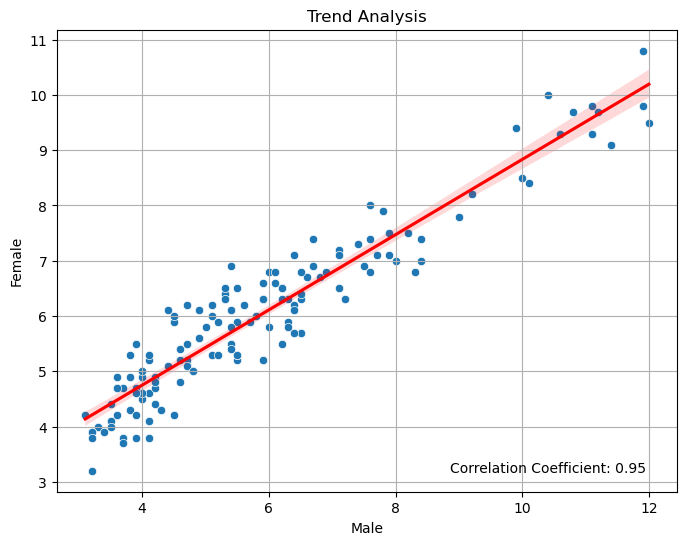

In [83]:
# Assuming you have a DataFrame named 'data' containing the columns 'variable1' and 'variable2'
# Calculate the correlation coefficient
correlation_coefficient = employ_df['Male'].corr(employ_df['Female'])

# Plot the trend using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employ_df, x='Male', y='Female')

# Fit a regression line
sns.regplot(data=employ_df, x='Male', y='Female', scatter=False, color='red')

# Add correlation coefficient to the plot
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='center', transform=plt.gca().transAxes)

plt.xlabel('Male')
plt.ylabel('Female')
plt.title('Trend Analysis')
plt.grid(True)
plt.show()

There is a very strong positive correlation between the unemployment rates for males and females in New Zealand, with a correlation coefficient of 0.95. This indicates that the unemployment rates for both genders tend to move in the same direction. In other words, when the unemployment rate for males increases, the unemployment rate for females also tends to increase, and vice versa. The high correlation coefficient of 0.95 suggests a close relationship between the two variables. This could be due to several factors that affect the labor market as a whole, such as economic recessions or booms. For example, during an economic downturn, employers may be more likely to lay off workers across the board, regardless of gender.

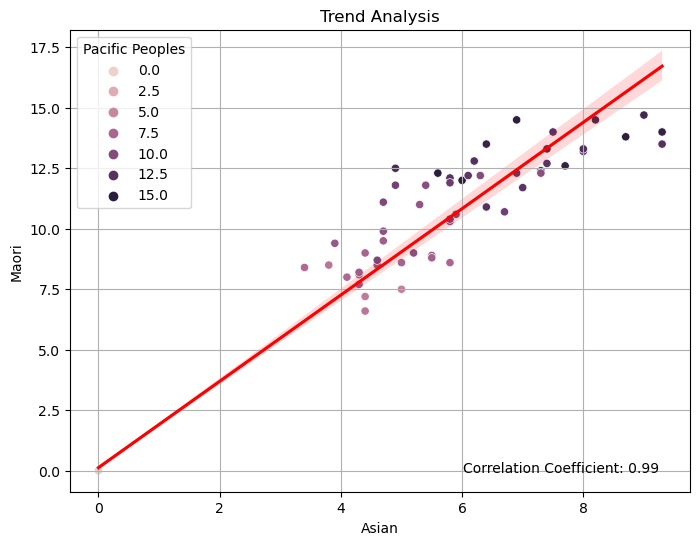

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' containing the columns 'variable1', 'variable2', and 'variable3'

# Calculate the correlation coefficient
correlation_coefficient = employ_df['Asian'].corr(employ_df['Maori'])

# Plot the trend using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employ_df, x='Asian', y='Maori', hue='Pacific Peoples')

# Fit a regression line
sns.regplot(data=employ_df, x='Asian', y='Maori', scatter=False, color='red')

# Add correlation coefficient to the plot
plt.text(0.95, 0.05, f'Correlation Coefficient: {correlation_coefficient:.2f}', ha='right', va='center', transform=plt.gca().transAxes)

plt.xlabel('Asian')
plt.ylabel('Maori')
plt.title('Trend Analysis')
plt.grid(True)
plt.show()


There is a very strong positive correlation between the unemployment rates of Asian, Māori, and Pacific Peoples in New Zealand, with a correlation coefficient of 0.99. This indicates that there is a very close relationship between the unemployment rates of these three ethnic groups. In other words, when the unemployment rate for one group increases, the unemployment rates for the other two groups also tend to increase, and vice versa.

A correlation coefficient this high suggests that the unemployment rates of these three groups move in almost perfect unison. This could be due to several factors that affect the labor market as a whole, such as economic recessions or booms. For instance, during an economic downturn, employers may be more likely to lay off workers across the board, regardless of ethnicity.

<Axes: >

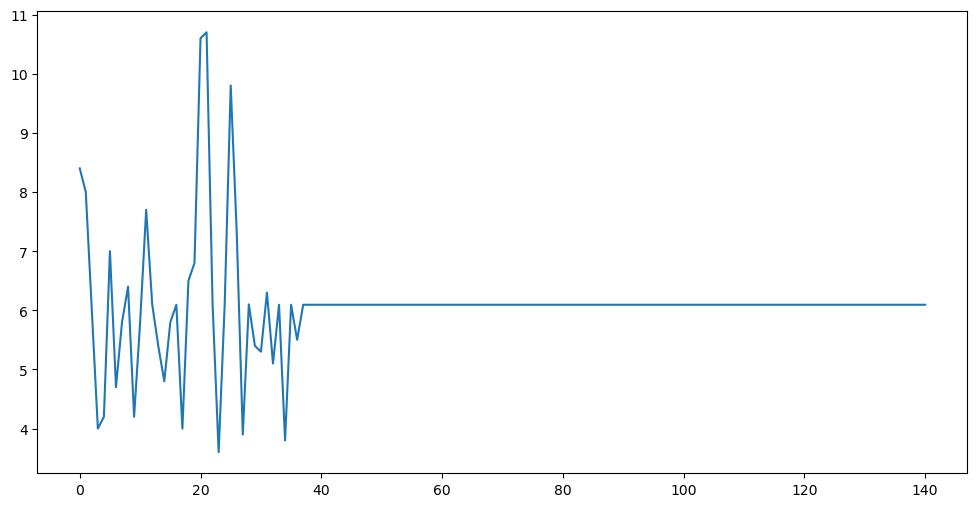

In [85]:
employ_df['unemployment_rate'].plot()

<Axes: >

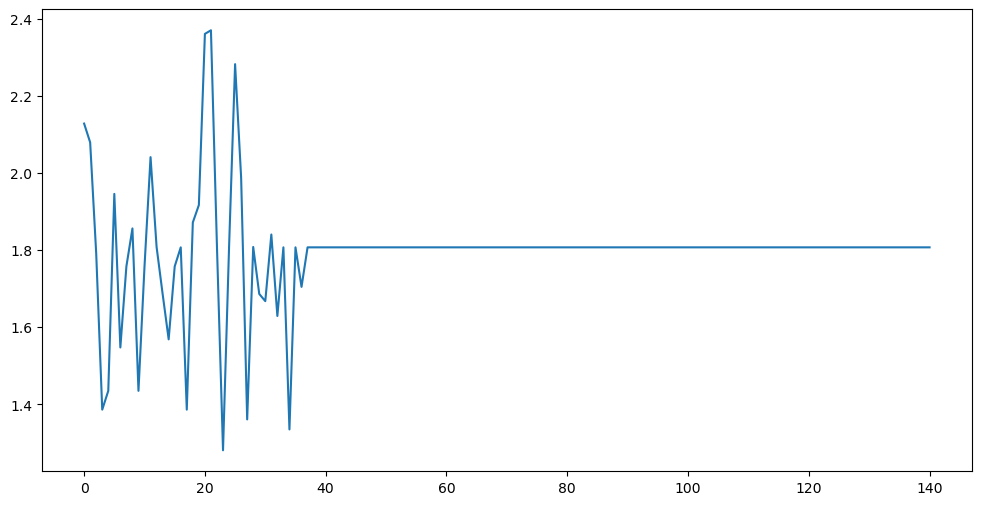

In [86]:
#import numpy as np

# Select the 'Unemployment_rate' column from the DataFrame
unemployment_rate_column = new_df['unemployment_rate']

# Apply np.log() function to the selected column
unemployment_rate_log = np.log(unemployment_rate_column)

# Plot the data
unemployment_rate_log.plot()


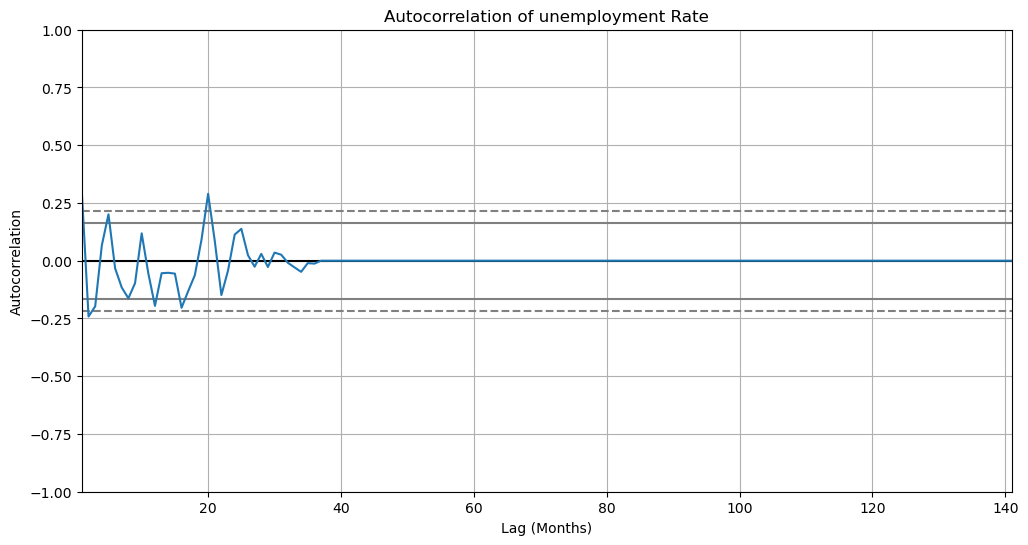

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Unemployment_rate' is the correct column name
# If it's different, replace it with the correct column name
autocorrelation = pd.plotting.autocorrelation_plot(new_df['unemployment_rate'])
plt.title('Autocorrelation of unemployment Rate')
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.show()


Economic inertia: The positive autocorrelation at lag 1 might be due to economic inertia. It can take time for economies to adjust to changes, so a high unemployment rate in one year can persist into the next year as businesses and workers adapt to the economic conditions.

Short-term memory: The gradual decline in autocorrelation over time suggests that the unemployment rate has a kind of "short-term memory" when it comes to past unemployment rates. The impact of past unemployment rates on the current rate weakens as we go further back in time.

## Conclusion

This exploratory data analysis (EDA) provided valuable insights into New Zealand's socio-economic landscape, particularly focusing on unemployment trends and disparities. Here's a summary of the key findings:

Strong Correlation Between Gender Unemployment Rates: A very strong positive correlation between male and female unemployment rates was observed, suggesting they are influenced by common factors like economic recessions or booms.
Similar Trends for Ethnic Groups: The unemployment rates of Māori, Asian, and Pacific Peoples exhibited an exceptionally strong positive correlation, indicating they are likely affected by shared labor market forces.
Potential Link Between Underemployment and Long-Term Unemployment: The analysis suggests a possible, but weak, correlation between underemployment and long-term unemployment rates. Further investigation is needed to explore the underlying causes.
Living Wage Gap and Unemployment: While a definitive conclusion couldn't be drawn due to missing values, a potential relationship between the unemployment rate and the gap between minimum and living wages warrants further examination.
Persistence of Unemployment: The positive autocorrelation of the unemployment rate suggests a degree of economic inertia, where high unemployment rates tend to persist into the following year.
These findings highlight the interconnectedness of various socio-economic factors in New Zealand. While the positive correlation between unemployment rates for different genders and ethnicities suggests a shared vulnerability to economic fluctuations, the weak correlation between underemployment and long-term unemployment points towards the need to explore other factors influencing these rates. Additionally, the potential link between the living wage gap and unemployment emphasizes the importance of policies that address income inequality.

This EDA serves as a springboard for further investigation. Future analyses could involve:

Including more recent data to capture the latest trends.
Incorporating additional variables like education level, industry, and geographical location to gain a more comprehensive understanding of unemployment disparities.
Employing statistical modeling techniques to quantify the relationships between the variables.

## Key Findings

Strong Shared Trends in Unemployment: There's a very strong positive correlation between unemployment rates for males and females, and between Māori, Asian, and Pacific Peoples. This suggests these groups are likely affected by similar factors in the labor market, such as economic booms and recessions.
Possible Link Between Underemployment and Long-Term Unemployment: A weak positive correlation was observed between underemployment and long-term unemployment rates. While the connection seems slight, it warrants further investigation to understand the underlying causes.
Living Wage Gap and Unemployment (Potential Relationship): Though a definitive conclusion is elusive due to missing data, there might be a link between the unemployment rate and the gap between the minimum wage and a living wage. This is an area for further exploration.
Persistence of Unemployment: The positive autocorrelation of the unemployment rate indicates a tendency for high unemployment to persist into the following year. This suggests a certain level of economic inertia where adjustments to changing conditions take time.